# Autoscout24 Price Predicton


In this project, we have predicted the price of autos by using different supervised learning models. We have already done EDA process on data and got the last dataframe that can be fitted into model.


## Linear Regression

In [1]:
# let's import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_pickle("golden_data_dummy.pkl")
df2 = pd.read_pickle("golden_data_not_dummy.pkl")
pd.set_option("display.max_columns", 50)

In [3]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,...,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [4]:
df.shape

(14990, 136)

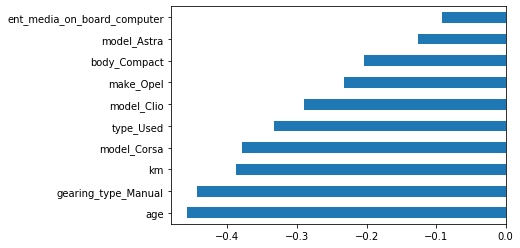

In [5]:
# looking through negatively correlated features with price
df.corr()['price'].sort_values().head(10).plot.barh()

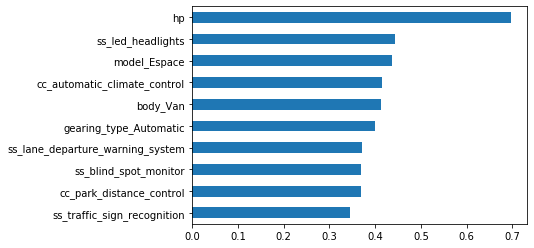

In [6]:
# looking through positively correlated features with price
df.corr()['price'].sort_values().tail(11)[:-1].plot.barh()

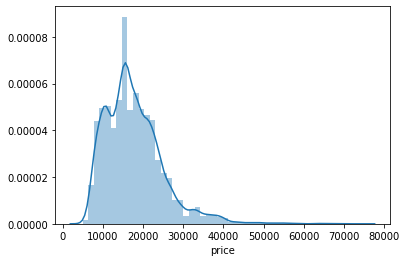

In [7]:
# distribution of the target
sns.distplot(df.price)

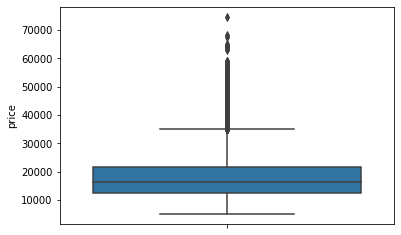

In [8]:
sns.boxplot(df.price, orient = "v") # dikey cizim orient vertical

In [9]:
# splitting target column
X = df.drop(["price"], axis=1)
y = df.price

In [10]:
# splitting test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X.shape

(14990, 135)

In [12]:
X_train.shape

(11992, 135)

In [13]:

def eval_metrics(actual, pred):
    '''using this function we can genarate mae, rmse, mse and r-squared evalution metrics once.'''
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [14]:
# model fitting
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#prediction of target
y_pred = lm.predict(X_test)

In [16]:
eval_metrics(y_test, y_pred)

r2_score: 0.8917673810996846 
 mae: 1672.3867626668177 
 mse: 5481554.524313033 
 rmse: 2341.271988538075


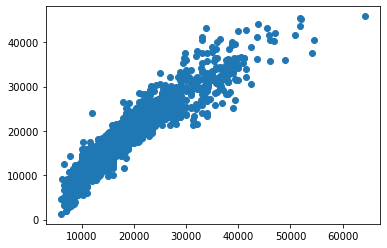

In [18]:
plt.scatter(y_test, y_pred)

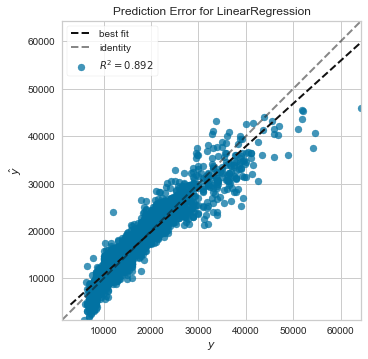

In [19]:
# let'visualze real and predicted price values using yellowbrick
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

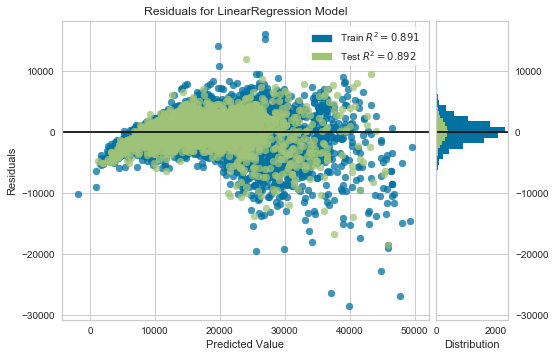

In [21]:
# Yellowbrick Residual Plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [23]:
my_dict = {'Actual':y_test,'Pred':y_pred}
compare = pd.DataFrame(my_dict)

In [24]:
compare.sample(5)

,Actual,Pred
2743,17300,15565.429081
5142,26188,28629.849050
9612,9690,10224.782672
6145,10700,8269.496066
5542,21978,24743.991587


In [26]:
# let's get the cross-validation score of our model
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)
cv_scores.mean()

0.8857213142604362

In [27]:
cv_scores

array([0.89934535, 0.8662727 , 0.88194013, 0.87955785, 0.89529942,
       0.88721162, 0.87829021, 0.88528645, 0.89981669, 0.88419272])

## Ridge and Lasso Regression: L1 and L2 Regularization

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

### 1 Ridge (L2 Regularization)

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function.


**||y - Xw||^2_2 + alpha * ||w||^2_2**


In [28]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [29]:
ridge_model = Ridge(normalize=True)

In [30]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [31]:
y_pred = ridge_model.predict(X_test)

In [32]:
eval_metrics(y_test, y_pred)

r2_score: 0.8390485500575235 
 mae: 1963.3528962238245 
 mse: 8151555.0264889095 
 rmse: 2855.092822744807


Without tuning Ridge model our score is lower than linear regression.

Let's regularize the Ridge model by tuning ```Lambda``` parameter (```alpha``` in sklearn).

In [33]:
alpha_space = np.linspace(0.1,20,50)

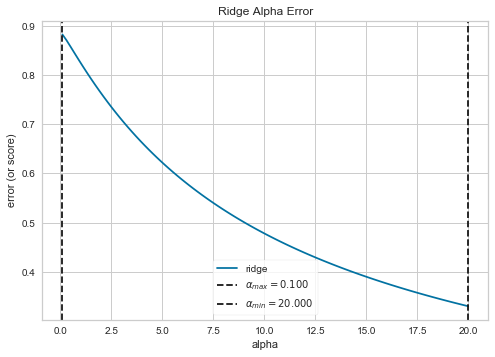

In [34]:
# lets see best alpha using yellowbrick
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)
visualizer.fit(X_train, y_train)
visualizer.show()

The graph above implies that best ```lambda``` parameter of the Ridge regression is quite low. So the Ridge regression for our data is not a big deal. Let's try more smaller ```alpha``` like 0.01.

In [35]:
ridge_model = Ridge(0.01, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8920596063211058 
 mae: 1668.7977194129394 
 mse: 5466754.471418855 
 rmse: 2338.1091658472355


When we compare the mae (mean absolute error) with the mae generated using the linear regression, only ***4$ decrese*** in error of price we can see.  

In [36]:
# Lets use RidgeCV to check  our results again
alpha_space = np.linspace(0.01,10,50)
ridgecv = RidgeCV(alphas=alpha_space, cv=10, normalize = True)
ridgecv.fit(X_train, y_train)
print('Best alpha:', ridgecv.alpha_)

Best alpha: 0.01


### 2 Lasso (L1 Regularization)

**Lasso** (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

**(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1**


In [37]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [43]:
lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8840377602740636 
 mae: 1698.8273169126865 
 mse: 5873029.279690901 
 rmse: 2423.4333660513344


In [39]:
alpha_space = np.linspace(0.1, 20, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize=True, cv = 5).fit(X_train, y_train)

In [40]:
lasso_cv_model.alpha_

0.1

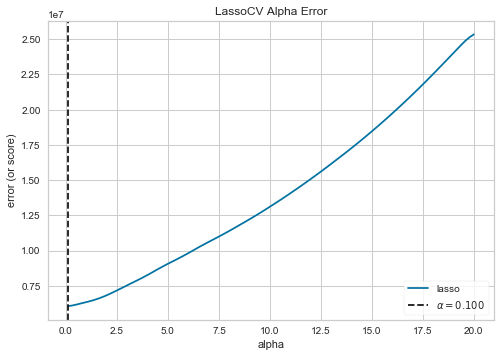

In [41]:
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

The graph above implies that best ```lambda``` parameter of the Lasso regression is also quite low.

However Lasso regression is also used to determine the important features, and helps us to eliminate the features non-significant.

If we increse the lambda parameter of Lasso we see that error increases. On the other hand we can check the lasso coeffcients to see the more resistant features to lasso regularization. 

In [44]:
feature_coef = pd.DataFrame({'features': X.columns, 'coef': lasso_model.coef_ })

In [45]:
feature_coef

,features,coef
0,displacement,0.000000
1,hp,102.157940
2,km,-0.032398
3,ss_abs,-0.000000
4,ss_adaptive_cruise_control,0.000000
...,...,...
130,type_Demonstration,2287.856547
131,type_Employee's car,-0.000000
132,type_New,1294.452977
133,type_Pre-registered,0.000000


In [47]:
significant_features = feature_coef[feature_coef['coef'] != 0]

In [48]:
significant_features.shape

(42, 2)

In [61]:
lasso_model = Lasso(3, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8581701765149503 
 mae: 1837.661262937154 
 mse: 7183120.195243902 
 rmse: 2680.1343614162147


In [62]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [63]:
# mask the features that their coefficient is zero.
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

25

In [64]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

25

In [65]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
99,model_Espace,4982.700680
90,make_Audi,2733.713457
59,cc_heads_up_display,1918.175583
130,type_Demonstration,1607.703460
95,model_A3,719.750400
79,cc_seat_ventilation,650.593684
21,ss_led_headlights,642.610900
132,type_New,564.687105
125,gearing_type_Semi-automatic,541.924970
73,cc_parking_assist_system_self_steering,535.681666


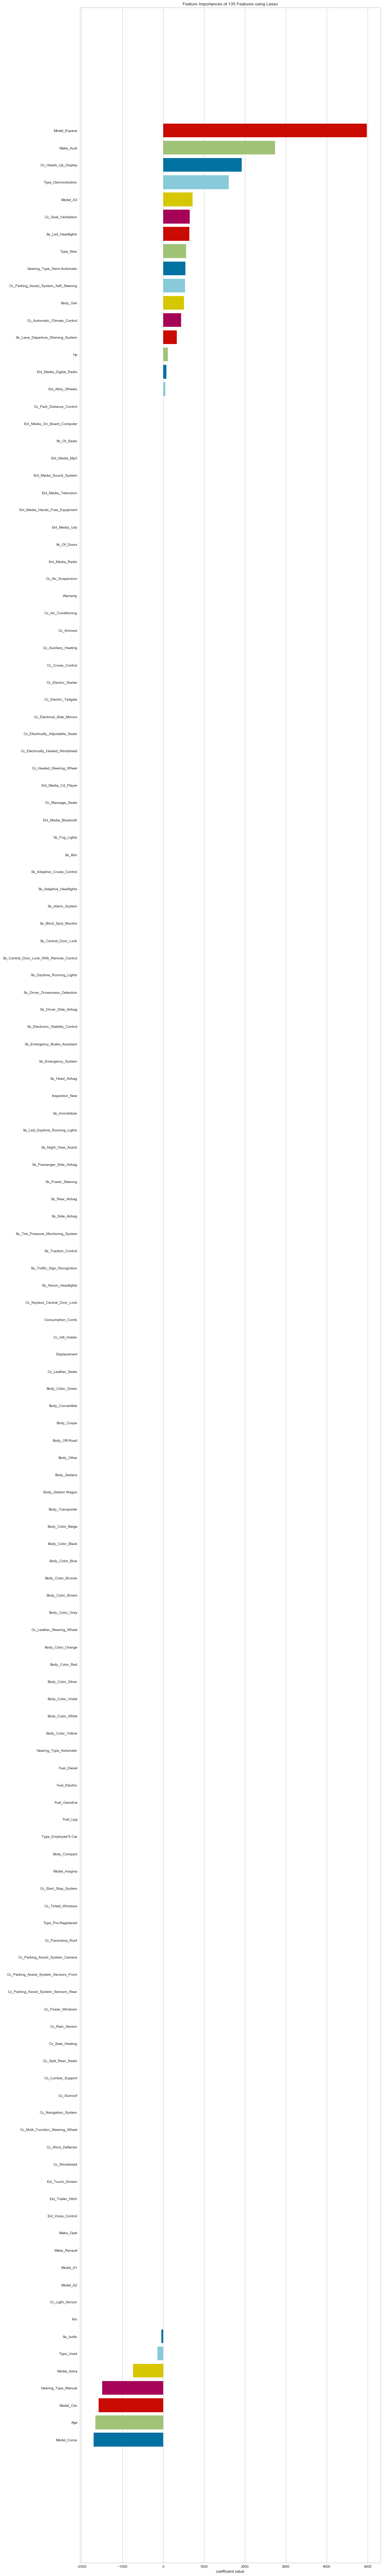

In [67]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

### Ramdom Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf_reg = RandomForestRegressor()

In [73]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [74]:
y_pred = rf_reg.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.9565543311090016 
 mae: 854.1659446836818 
 mse: 2200351.47713278 
 rmse: 1483.3581756045235


### RF Feature Importance

In [75]:
rf_reg.feature_importances_

array([1.00890955e-02, 4.60361753e-01, 7.54069858e-02, 2.36736373e-04,
       7.55478380e-04, 3.32747283e-04, 6.60107136e-04, 4.18590889e-04,
       3.05346005e-04, 2.22980341e-04, 4.26570224e-04, 1.08269132e-04,
       2.56486945e-04, 3.28371892e-04, 4.10856220e-04, 2.56572671e-04,
       5.90665740e-04, 2.03796955e-04, 4.54121598e-04, 7.56734362e-04,
       4.02098692e-04, 1.82815365e-03, 5.50582519e-04, 7.55176055e-05,
       2.01452711e-04, 2.05974982e-03, 2.30021619e-04, 2.81838051e-04,
       4.02411825e-04, 4.06142563e-04, 3.13124481e-04, 7.21908645e-04,
       7.11657616e-03, 4.24426244e-04, 1.84538815e-01, 3.88286155e-03,
       5.23964757e-04, 5.43738331e-04, 4.52343026e-04, 4.39780171e-04,
       3.46846387e-04, 7.40085908e-04, 5.70395039e-04, 3.57736145e-05,
       6.64228518e-04, 1.01197414e-03, 2.47628028e-03, 8.11623098e-04,
       1.88334343e-04, 6.06186973e-05, 6.38195883e-04, 7.58338049e-04,
       1.13490494e-04, 4.60913824e-04, 0.00000000e+00, 6.11735111e-04,
      

In [76]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_},
                          index = X_train.columns)

In [79]:
importance.sort_values(by='importance', ascending =False).head(10)

,importance
hp,0.460362
age,0.184539
km,0.075407
make_Audi,0.061120
model_Espace,0.060635
gearing_type_Manual,0.019009
cc_park_distance_control,0.017918
model_Astra,0.010760
displacement,0.010089
model_A3,0.009108


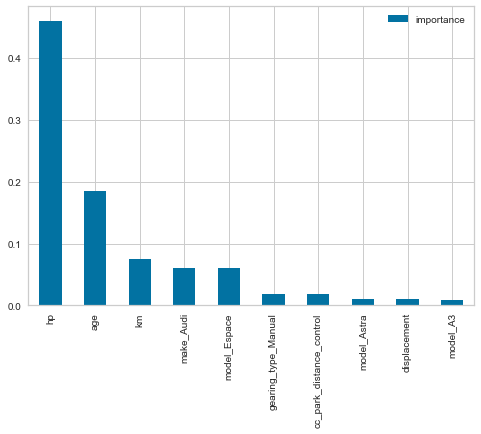

In [80]:
importance.sort_values(by='importance', ascending =False).head(10).plot.bar()

**Let's choose 4 features and save our scikit learn model, then try for an example**

In [81]:
df2 = pd.read_pickle("golden_data_not_dummy.pkl")

In [82]:
new_list=['hp','age','km','model']

In [83]:
X =df2[new_list]

In [84]:
X.head()

,hp,age,km,model
0,66.0,3,56013,A1
1,141.0,2,80000,A1
2,85.0,3,83450,A1
3,66.0,3,73000,A1
4,66.0,3,16200,A1


In [85]:
y = df2['price']#


In [86]:
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [87]:
X = pd.get_dummies(X)

In [88]:
X.head()

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,66.0,3,56013,1,0,0,0,0,0,0,0
1,141.0,2,80000,1,0,0,0,0,0,0,0
2,85.0,3,83450,1,0,0,0,0,0,0,0
3,66.0,3,73000,1,0,0,0,0,0,0,0
4,66.0,3,16200,1,0,0,0,0,0,0,0


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
y_pred = rf_reg.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9017747392987852 
 mae: 1458.1110373306137 
 mse: 5291418.853045356 
 rmse: 2300.308425634562


**RF Model Tuning**

In [93]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [94]:
rf_cv_model = GridSearchCV(rf_reg, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  4.5min finished


In [95]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_split': 6,
 'n_estimators': 300}

In [122]:
rf_tuned = RandomForestRegressor(max_depth = 11,
                                max_features = 6,
                                min_samples_split = 6,
                                 n_estimators = 500)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [121]:
y_pred = rf_tuned.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9005584753614134 
 mae: 1462.030053182406 
 mse: 5356939.289260485 
 rmse: 2314.5062733249365


### XGBoost

In [124]:
import xgboost

In [125]:
X=df.drop(['price'], axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model_xg = xgboost.XGBRegressor()
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [127]:
y_pred = model_xg.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9564463812797797 
 mae: 927.764767657605 
 mse: 2199913.2035777126 
 rmse: 1483.2104380625537


In [130]:
new_list=['hp','age','km','model']

X =df2[new_list]
y = df2['price']
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [131]:
model_xg = xgboost.XGBRegressor()
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [132]:
model_xg.predict(X_test)
y_pred = model_xg.predict(X_test)
eval_metrics(y_test, y_pred)


r2_score: 0.9154993278862348 
 mae: 1428.4545620024383 
 mse: 4552071.904170076 
 rmse: 2133.5585073229363


In [62]:
import pickle
pickle.dump(rf_reg, open("saved_model", 'wb'))


In [63]:
model = pickle.load(open("saved_model", "rb")) 

In [64]:
my_dict = {
    "hp": 200,
    "age": 1,
    "km": 100000,
    "model": 'A3'
}

In [65]:
df = pd.DataFrame.from_dict([my_dict])

In [66]:
df.head()

,hp,age,km,model
0,200,1,100000,A3


In [67]:
columns = X.columns
columns

Index(['hp', 'age', 'km', 'model_A1', 'model_A2', 'model_A3', 'model_Astra',
       'model_Clio', 'model_Corsa', 'model_Espace', 'model_Insignia'],
      dtype='object')

In [68]:
df = pd.get_dummies(df).reindex(columns=columns, fill_value=0)

In [69]:
df.head()

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,200,1,100000,0,0,1,0,0,0,0,0


In [70]:
pred = list(model.predict(df))

In [72]:
pred

[34805.69983017852]